## Machine learning intro

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif) 

### Loss function

Training and quality assessment of the model is carried out on independent sets of examples. As a rule, existing examples are divided into two subsets: training (train) and test (test). The choice of split ratio is a compromise. Indeed, the large size of the training leads to better algorithms, but more noise when evaluating the model on the test. Conversely, a large test sample size leads to a less noisy quality assessment, but the trained models are less accurate.

Many classification models predict a rating of membership to a positive class $ \tilde {y} (x) \in R $ (for example, the probability of being a class 1). After that, a decision is made on the class of the object by comparing the estimate with a certain threshold $ \ theta $:

$$y(x) = 
\begin{cases}
+1, &\text{if} \; \tilde{y}(x) \geq \theta \\
-1, &\text{if} \; \tilde{y}(x) < \theta
\end{cases}
$$

In this case, we can consider metrics that can work with the initial response of the classifier. In the assignment, we will work with the AUC-ROC metric, which in this case can be considered as the proportion of incorrectly ordered pairs of objects sorted by ascending the predicted grade 1 grade. A detailed understanding of how the AUC-ROC metrics work for this lab is not required.

### Selection of hyperparameters of the model

In machine learning tasks, one should distinguish between model parameters and hyperparameters (structural parameters). Typically, model parameters are adjusted during training (for example, weights in a linear model or a decision tree structure), while hyper parameters are set in advance (for example, the value of the regularization force in a linear model or the maximum depth of a decision tree). Each model, as a rule, has a lot of hyperparameters and there are no universal sets of hyperparameters that work optimally in all tasks, so for each task you need to choose your own set.

To optimize the hyperparameters, models often use __search on the grid (grid search)__: for each hyperparameter, several values are selected, then all combinations of values are selected and a combination is selected on which the model shows the best quality (in terms of the metric being optimized). However, in this case, it is necessary to correctly evaluate the constructed model, namely, to do the partition into a training and test sample. There are several schemes for how this can be implemented:

 - Break the available sample into training and test. In this case, the comparison of a large number of models in the enumeration of hyperparameters leads to a situation where the best model on the test subsample does not retain its qualities on the new data. We can say that there is a _transition_ on a test sample.
 - To eliminate the problem described above, you can split the data into 3 non-overlapping subsamples: training, validation, and test. Validation subsample is used to compare models, and test - for the final quality assessment and comparison of families of models with selected hyperparameters.
 - Another way to compare models is [cross-validation] (http://bit.ly/1CHXsNH). There are various cross-validation schemes:
  - Leave-One-Out
  - K-Fold
  - Repeated random sampling
  
Cross validation is computationally expensive, especially if you are iterating over a grid with a very large number of combinations. Given the finiteness of the time to perform the task, a number of compromises arise: 
  - the hyperparameter grid can be made more sparse by going through fewer values of each hyperparameter; however, you should not forget that in this case you can skip a good combination of hyperparameters;
  - cross-validation can be done with a smaller number of splits or folds, but in this case the quality assessment becomes more noisy and the risk of choosing a non-optimal set of hyperparameters increases due to randomness of splitting
  - hyperparameters can be optimized sequentially (greedily) - one by one, and not to go through all the combinations; such a strategy does not always lead to an optimal set;
  - sort through not all combinations of hyperparameters, but a small number of randomly selected ones.

### Task

In this lab, we will learn to teach machine learning models, correctly set up experiments, select hyperparameters, compare and mix models.

You are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.
 
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (11340 observations) contains both features and the Cover_Type.

# Data Fields
__Elevation__ - Elevation in meters  
__Aspect__ - Aspect in degrees azimuth  
__Slope__ - Slope in degrees  
__Horizontal_Distance_To_Hydrology__ - Horz Dist to nearest surface water features  
__Vertical_Distance_To_Hydrology__ - Vert Dist to nearest surface water features  
__Horizontal_Distance_To_Roadways__ - Horz Dist to nearest roadway  
__Hillshade_9am__ (0 to 255 index) - Hillshade index at 9am, summer solstice  
__Hillshade_Noon__ (0 to 255 index) - Hillshade index at noon, summer solstice  
__Hillshade_3pm__ (0 to 255 index) - Hillshade index at 3pm, summer solstice  
__Horizontal_Distance_To_Fire_Points__ - Horz Dist to nearest wildfire ignition points  
__Wilderness_Area__ - Wilderness area designation  
__Soil_Type__ - Soil Type designation  
__Cover_Type__ (7 types, integers 1 to 7) - Forest Cover Type designation  

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

Download the data set **forest_train.csv**. To better understand what you are working with / whether you have correctly loaded the data, you can display the first few lines on the screen.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./forest_train.csv')
df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,Cover_Type
0,0,2340,321,13,272,130,984,185,227,181,752,5,4,6
1,1,3003,315,16,67,0,3408,176,226,189,1126,22,3,1
2,2,2912,39,13,306,102,306,220,212,124,607,29,1,2
3,3,3292,285,29,999,194,3695,129,225,230,2356,27,3,1
4,4,2588,247,4,212,-8,300,212,242,168,6186,29,1,5


Sometimes there are gaps in the data. The way to designate gaps is either prescribed in the data description, or at the skip place after reading the data, the value [NaN] appears (https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). For more information about working with passes in Pandas, you can read for example [here] (http://pandas.pydata.org/pandas-docs/stable/missing_data.html).
In this dataset, missing values are marked with a "?".

**(1 point) Task 1.** Usually, after loading a dataset, some preprocessing is always necessary. In this case, it will be as follows:
 - Find all the features that have missing values. Remove from the sample all objects with gaps.


 - Save the target variable (the one we want to predict) into a separate variable

In [3]:
# df.columns

In [4]:
y = np.array(df.Cover_Type)

X = # Select only the columns that are not target here.
X.head()

 - In this part we will work on binary classification problem. That is why we will select only the examples with Cover Type 1 and 2. Next we will classify examples with Cover Type 1 vs examples with Cover Type 2.

In [69]:
X_bin = X[(y == 1) | (y == 2)]
y_bin = y[(y == 1) | (y == 2)]

 - Please note that not all features are real (numeric). In the beginning we will work only with real features. Save them separately.

In [71]:
numeric_cols = [
# Select only the columns that are numerical here.
]

num_features = X_bin[numeric_cols] # Select only numeric features here
num_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
1,3003,315,16,67,0,3408,176,226,189,1126
2,2912,39,13,306,102,306,220,212,124,607
3,3292,285,29,999,194,3695,129,225,230,2356
7,3236,252,9,324,17,920,199,247,186,2310
13,3199,268,6,216,13,5918,204,243,178,1736


### (2 points) Training classifiers on real features

In this section, it will be necessary to work only with real attributes and the target variable.

In the beginning we will look at how the selection of hyperparameters on the grid works and how the quality of the partitioning affects the quality. Now and further we will consider 4 algorithms:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

To begin with, the first three algorithms will choose one hyperparameter, which we will optimize:
  - kNN - number of neighbors (* n_neighbors *)
  - DecisonTree - tree depth (* max_depth *)
  - SGD Linear Classifier - optimized function (* loss *)
 
Leave the default values for the remaining hyperparameters. For the selection of hyperparameters, use the search on the grid, which is implemented in the class [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). As a cross-validation scheme, use 5-Fold CV, which can be set using the class [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)



**(1.5 points) Task 2.** For each algorithm, select the optimal values of the specified hyperparameters. Build a graph of the average value of the quality of the cross-validation algorithm for a given value of the hyperparameter, which also display the confidence interval.

To obtain the value of quality on each fold, the average value of quality and other useful information, you can use the field [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

Which algorithm has the highest average quality ?

Largest confidence interval ?

In [72]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Insert value that should be checked during the grid search of optimal parameters
classifiers = {
    KNeighborsClassifier:   [{'n_neighbors': [<Student, change me>]}],
    DecisionTreeClassifier: [{'max_depth'  : [<Student, change me>]}],
    SGDClassifier:          [{'loss'       : [<Student, change me>]}]
}

trained_clfs = []

for classifier, params in classifiers.items():
    clf = GridSearchCV(classifier(), param_grid=params, cv=KFold(n_splits=5), return_train_score=True)
    clf.fit(num_features.values, y_bin)
    trained_clfs.append([clf])

In [6]:
plt.figure(figsize=(10, 8))
mean_values = []
stds = []
names = []

for clf in trained_clfs:
    mean_vals = clf[0].cv_results_['mean_test_score']
    std_vals = clf[0].cv_results_['std_test_score']
    params = clf[0].cv_results_['params'][0]
    
    idx = np.argmin(clf[0].cv_results_['rank_test_score'])
    opt_params = clf[0].cv_results_['params'][idx]
    mean = clf[0].cv_results_['mean_test_score'][idx]
    std = clf[0].cv_results_['std_test_score'][idx]
    name = clf[0].estimator.__str__().split('(')[0] + ' , {}'.format(opt_params)
    stds.append(std)
    mean_values.append(mean)
    names.append(name)

plt.title('Performance of classifiers with the best optimized parameter value')
plt.errorbar(np.arange(len(mean_values)), mean_values, stds, linestyle='None', marker='*')
plt.ylabel('accuracy')
plt.xlabel('classifier')
plt.xticks(np.arange(len(mean_values)), names)
plt.show()

**(0.5 point) Task 3.** Now let's select the number of trees (**n_estimators**) in the RandomForest algorithm. As you might know, in general, Random Forest does not overfit with an increase in the number of trees. Pick the number of trees starting from which the quality on cross-validation stabilizes. Note that to conduct this experiment, it is not necessary to train many random forests with different numbers of trees from scratch: train one random forest with the maximum interesting number of trees, and then consider subsets of trees of different sizes consisting of trees of the constructed forest (field [**estimators_**](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). In further experiments, use the number of trees found.

It is difficult to apply the **GridSearchCV** class in this task, so it is suggested to write a cycle on the number of trees.

In [75]:
from sklearn.model_selection import cross_val_score

In [138]:
kf = KFold(n_splits=5)
clfs = []

for train_index, test_index in kf.split(num_features.values):
    X_train, X_test = num_features.values[train_index], num_features.values[test_index]
    y_train, y_test = y_bin[train_index], y_bin[test_index]
    
    clf = <Create random forest classifier here>
    <Train random forest classifier here>
    
    clfs.append([clf, X_test, y_test - 1])

In [139]:
scores_by_fold = []

for clf_n_data in clfs:
    clf, x, y = clf_n_data
    predictions = []
    
    for estimator in clf.estimators_:
        predictions.append(<Make prediction here>)
        
    scores_by_fold.append([np.array(predictions), y])
    
quality_by_num_trees = []
for num_trees in range(1, 301):
    quality = []
    
    for predictions, labels in scores_by_fold:
        vote = (predictions[:num_trees, :].mean(axis=0) > 0.5).astype(np.int64)
        quality.append((vote == labels).sum() / float(len(labels)))
        
    quality_by_num_trees.append(quality)

In [13]:
means = []
stds = []
xs = []
for i, num_trees in enumerate(range(1, 301)):
    means.append(np.mean(quality_by_num_trees[i]))
    stds.append(np.std(quality_by_num_trees[i]))
    xs.append(num_trees)
    
plt.figure(figsize=(10, 8))
plt.plot(xs, means, 'b', label='accuracy')
plt.title('Avg quality by num_trees')
plt.xlabel('num_trees')
plt.xlabel('accuracy')
plt.legend(loc="best")
plt.fill_between(xs, np.array(means) - np.array(stds), np.array(means) + np.array(stds), facecolor='green')

When learning algorithms, it is worth paying attention not only to their quality, but also how they work with data. In this problem, it turned out that some of the algorithms used are sensitive to the scale of features. To make sure that this could affect the quality, let's look at the meanings of the attributes themselves.

**(1 point) Task 4.** Look at the values of the features **Aspect**, **Slope**, **Hillshade_9am**. What is the feature of the data? Which of the considered algorithms can affect this? Can scaling affect the operation of these algorithms?

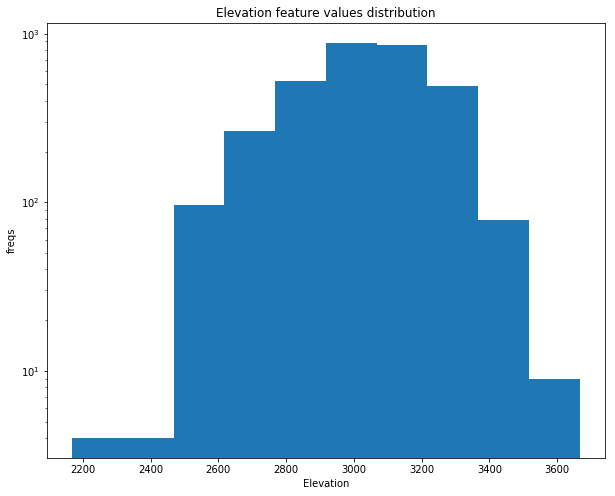

In [104]:
plt.figure(figsize=(10, 8))
plt.hist(np.array(num_features.Elevation))
plt.yscale('log')
plt.ylabel('freqs')
plt.xlabel('Elevation')
plt.title('Elevation feature values distribution')
plt.show()

In [ ]:
# Repeat for other features

You can scale attributes, for example, in one of the following ways:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, where $\mu, \sigma$ — the mean and standard deviation of the characteristic value over the entire sample (see the function [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, where $[x_{min}, x_{max}]$ — minimum interval of characteristic values

Similar scaling schemes are given in classes [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) and [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 point) Task 5.** 

Scale all numerical attributes using one of the above methods and select the optimal values of the hyperparameters in the same way as above.

Has the quality of some algorithms changed and why?

In [105]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaled_features = <Scale features here>

In [8]:
<Compute and plot average quality by num trees with normalised features here>

**(1.5 point) Task 6.** Now go through several hyperparameters across the grid and find the optimal combinations (best average quality value) for each algorithm in this case:
  - KNN - number of neighbors (**n_neighbors**) and metric (**metric**)
  - DecisonTree - tree depth (**max_depth**) and partitioning criterion (**criterion**)
  - RandomForest - the partitioning criterion in trees (**criterion**) and the maximum number of considered features (**max_features**); use the trees found earlier
  - SGDClassifier - optimized function (**loss**) and **penalty**
 
Please note that this operation can be resource intensive and time consuming. How to optimize the selection of parameters on the grid is described in the section "Selection of hyperparameters of the model".

Which algorithm has the best quality?

In [10]:
# Insert value that should be checked during the grid search of optimal parameters

classifiers = {
    KNeighborsClassifier: [{'n_neighbors': [<Student, change me>],
                            'metric': [<Student, change me>]
                           }],
    DecisionTreeClassifier: [{'max_depth': [<Student, change me>], 
                              'criterion': [<Student, change me>]
                             }],
    SGDClassifier: [{'loss': [<Student, change me>],
                     'penalty': [<Student, change me>]}],
    RandomForestClassifier: [{'criterion': [<Student, change me>],
                              'max_features': [<Student, change me>],
                              'n_estimators': [<Put correct number here>]
                             }]
}

trained_clfs = []

for classifier, params in classifiers.items():
    clf = GridSearchCV(classifier(), param_grid=params, cv=KFold(n_splits=5), return_train_score=True)
    clf.fit(scaled_features, y_bin)
    trained_clfs.append([clf, ])

In [11]:
plt.figure(figsize=(10, 8))
mean_values = []
stds = []
names = []

for clf in trained_clfs:
    mean_vals = clf[0].cv_results_['mean_test_score']
    std_vals = clf[0].cv_results_['std_test_score']
    params = clf[0].cv_results_['params'][0]
    
    idx = np.argmin(clf[0].cv_results_['rank_test_score'])
    opt_params = clf[0].cv_results_['params'][idx]
    mean = clf[0].cv_results_['mean_test_score'][idx]
    std = clf[0].cv_results_['std_test_score'][idx]
    name = clf[0].estimator.__str__().split('(')[0]
    stds.append(std)
    mean_values.append(mean)
    names.append(name)

plt.title('Performance of classifiers with the best optimized parameter value')
plt.errorbar(np.arange(len(mean_values)), mean_values, stds, linestyle='None', marker='*')
plt.ylabel('accuracy')
plt.xlabel('classifier')
plt.xticks(np.arange(len(mean_values)), names)
plt.show()

**(1.5 points) Task 7.** Build for different algorithms graphics [learning curves](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), depicting the dependence of quality on test and training samples on the number of objects on which models are trained. Look at the behavior of the curves and answer the questions:
* Can the quality on the test sample decrease with an increase in the number of objects? And on the training? Why? 
* For what purposes can quality knowledge be used on the training part of the sample?
* Which algorithm is better trained on fewer objects?
* Can the addition of new objects significantly improve the quality of any of the algorithms or, with the existing data set for all algorithms, saturation occur?

In [12]:
from sklearn.model_selection import learning_curve

In [144]:
# Taken from here: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [14]:
for clf in trained_clfs:
    name = clf[0].estimator.__str__().split('(')[0]
    plot_learning_curve(clf[0].best_estimator_, 'Learning Curves ({})'.format(name), scaled_features, y_bin, cv=KFold(n_splits=5))
    plt.show()

### (1 point) Adding categorical features to models

So far we have not used non-numeric attributes that are in dataset. Let's see if we did the right thing and whether the quality of the models will increase after adding these attributes.

**(0.5 points) Task 8.** Transform all categorical features using the one-hot-encoding method (for example, you can do this using [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) or [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from sklearn).

In [147]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [148]:
X.columns

Index(['Unnamed: 0', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type',
       'Wilderness_Area'],
      dtype='object')

In [17]:
numeric_cols = [
# Select only the columns that are categorical here.
]

cat_features = X_bin[cat_columns]
cat_features.head()

In [177]:
enc = OneHotEncoder(categories='auto')
categorical_encoded_features = enc.fit_transform(cat_features).todense()

Since after coding, signs turned out to be quite a lot, in this work we will not re-select the optimal hyperparameters for models taking into account new signs (although it would be better to do it). 

**(0.5 points) Task 9.** Add coded categorical to scaled real-time features and train algorithms with the best hyper-parameters found earlier. Did the addition of new signs increase the quality? Measure quality as before using a 5-fold CV. For this it is convenient to use the function [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Is the best classifier now different from the best in the previous paragraph?

In [178]:
all_features = np.hstack([X_bin, categorical_encoded_features])

In [ ]:
<do the rest here>

### (2 points) Mixing models (blending)
When implementing their models, it is good practice to create sklearn-compatible classes. First, such an implementation will have a standard interface and will allow other people to teach the models you have implemented without serious consequences. Secondly, it is possible to use any sklearn package functionality that accepts a model as input, for example, the class **GridSearchCV**, **learning_curve** and others.

Create a classifier that is initialized with two arbitrary classifiers and the $ \ alpha $ parameter. During training, such a classifier should train both basic models, and at the stage of prediction, knead predictions of basic models according to the formula indicated above.

To create a custom classifier, you must inherit from the base classes.


In all the preceding paragraphs, we obtained many strong models that can be quite different in nature (for example, the method of the nearest neighbors and the random forest). Often in practice it is possible to increase the quality of prediction by mixing different models. Let's see if this approach really gives an increase in quality.

Choose from the constructed models of the two previous points two, which gave the highest quality on cross-validation (we denote them $ clf_1 $ and $ clf_2 $). Next, build a new classifier, whose answer on some object $ x $ will look like this:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

where $ \alpha $ is a hyper-parameter of the new classifier.

**(1 point) Task 10.**
When implementing their models, it is good practice to create sklearn-compatible classes. First, such an implementation will have a standard interface and will allow other people to teach the models you have implemented without serious consequences. Secondly, it is possible to use any sklearn package functionality that accepts a model as input, for example, the class * GridSearchCV *, * learning_curve * and others.

Create a classifier that is initialized with two arbitrary classifiers and the $ \ alpha $ parameter. During training, such a classifier should train both basic models, and at the stage of prediction, knead predictions of basic models according to the formula indicated above.

To create a custom classifier, you must inherit from the base classes.
*[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* and implement methods*\_\_init\_\_, fit, predict and predict_proba*. Example sklearn-compatible classifier with comments can be found [here](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [20]:
class BlendingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1=None, clf2=None, alpha=None):
        pass # IMPLEMENT ME
    
    def fit(self, x, y):
        pass # IMPLEMENT ME
    
    def predict(self, x):
        pass # IMPLEMENT ME
    
    def predict_proba(self, x):
        pass # IMPLEMENT ME

**(1 point) Task 11.** Select the value $ \ alpha $ for this classifier from the grid from 0 to 1. If the class is implemented correctly, then you can use * GridSearchCV *, as is the case with conventional classifiers.

Draw on the graph the average quality of the folds and the confidence interval depending on $ \ alpha $.

Did this approach increase in quality compared to models that were trained separately? Explain why even simple blending of models can influence the final quality?

In [186]:
clf = GridSearchCV(
    BlendingClassifier(
        clf1=trained_clfs[1][0],
        clf2=trained_clfs[3][0]
    ), param_grid=[{'alpha': np.linspace(0, 1, num=10)}],
    cv=KFold(n_splits=5), return_train_score=True)

trained = clf.fit(all_features, y_bin)

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(trained.cv_results_['param_alpha'].data.astype(np.float32), trained.cv_results_['mean_test_score'], 'b', label='accuracy')
plt.title('Mean folds accuracy')
plt.xlabel('x')
plt.xlabel('alpha')
plt.legend(loc="best")
plt.fill_between(trained.cv_results_['param_alpha'].data.astype(np.float32), trained.cv_results_['mean_test_score'] - trained.cv_results_['std_test_score'], trained.cv_results_['mean_test_score'] +  trained.cv_results_['std_test_score'], facecolor='green')

## (1 point) Models comparison

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

After many models have been built, the right continuation is to compare them with each other. At the visualization workshop, you were shown how to build a “box plot”. We use it to compare the algorithms with each other.

**(1 point) Task 12.** For each type of classifier (kNN, DecisionTree, RandomForest, SGD classifier), as well as a mixed model, choose the one that gave the best quality for cross-validation and build a span diagram. All classifiers should be displayed on the same graph.
 
Make general summary conclusions about the classifiers in terms of their work with the signs and the complexity of the model itself (what kind of hyperparameters the model has, whether changing the value of the hyperparameter greatly affects the quality of the model).

In [190]:
trained_clfs.append([trained])

In [191]:
mean_values = []
splits = []
stds = []
names = []

for clf in trained_clfs:
    mean_vals = clf[0].cv_results_['mean_test_score']
    std_vals = clf[0].cv_results_['std_test_score']
    params = clf[0].cv_results_['params'][0]
    
    idx = np.argmin(clf[0].cv_results_['rank_test_score'])
    opt_params = clf[0].cv_results_['params'][idx]
    mean = clf[0].cv_results_['mean_test_score'][idx]
    std = clf[0].cv_results_['std_test_score'][idx]
    name = clf[0].estimator.__str__().split('(')[0]
    split = []
    for i in range(5):
        split.append(clf[0].cv_results_['split{}_test_score'.format(i)][idx])
    stds.append(std)
    mean_values.append(mean)
    names.append(name)
    splits.append(split)

In [24]:
results_df = pd.DataFrame(data=np.asarray(splits).T, columns=[names])
ax = results_df.boxplot(figsize=(15, 8), return_type='axes', sym='k.')
_ = plt.setp(ax.lines, linewidth=2.0)

# Bonus task 1
Try to find the best classifier (using the procedure above) for full dataset with all cover types

# Bonus task 2
One with the best performance on the full dataset gets a chocolate.
You are not allowed to use additional data.
You are allowed to use publically available code.
You are free to create derived features from existing ones, experiment with different methods (classes of sklearn) and even to apply deep methods here.